In [247]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [169]:
source_dir = '/mnt/c/Users/natra/Documents/Research/Iraq-post-conflict-rebel-governance'
monthly_adm3_geo_file = source_dir + '/data/combined/monthly_adm3_data.geojson'

In [170]:
month_adm3_data = gpd.read_file(monthly_adm3_geo_file)

In [171]:
print(month_adm3_data.shape)
month_adm3_data.columns

(77616, 29)


Index(['ADM3_EN', 'month', 'mean_evi', 'mean_evi_scaled', 'max_evi',
       'max_evi_scaled', 'ACTION_IND', 'ACTION_DIR', 'ACTION_PRT', 'pop_count',
       'pop_density', 'disputed_area', 'iom_attacked', 'iom_occupied',
       'isil_ingroup_prior', 'isil_ingroup_curr', 'retaken_year',
       'retaken_post_2016', 'iom_no_isil_action', 'Shape_Area', 'ADM3_AR',
       'ADM3_PCODE', 'ADM2_EN', 'ADM2_AR', 'ADM2_PCODE', 'ADM1_EN', 'ADM1_AR',
       'ADM1_PCODE', 'geometry'],
      dtype='object')

(294, 5)


Text(0.5, 1.0, 'ISIS-Occupied Areas by Year Retaken from ISIS (IOM)')

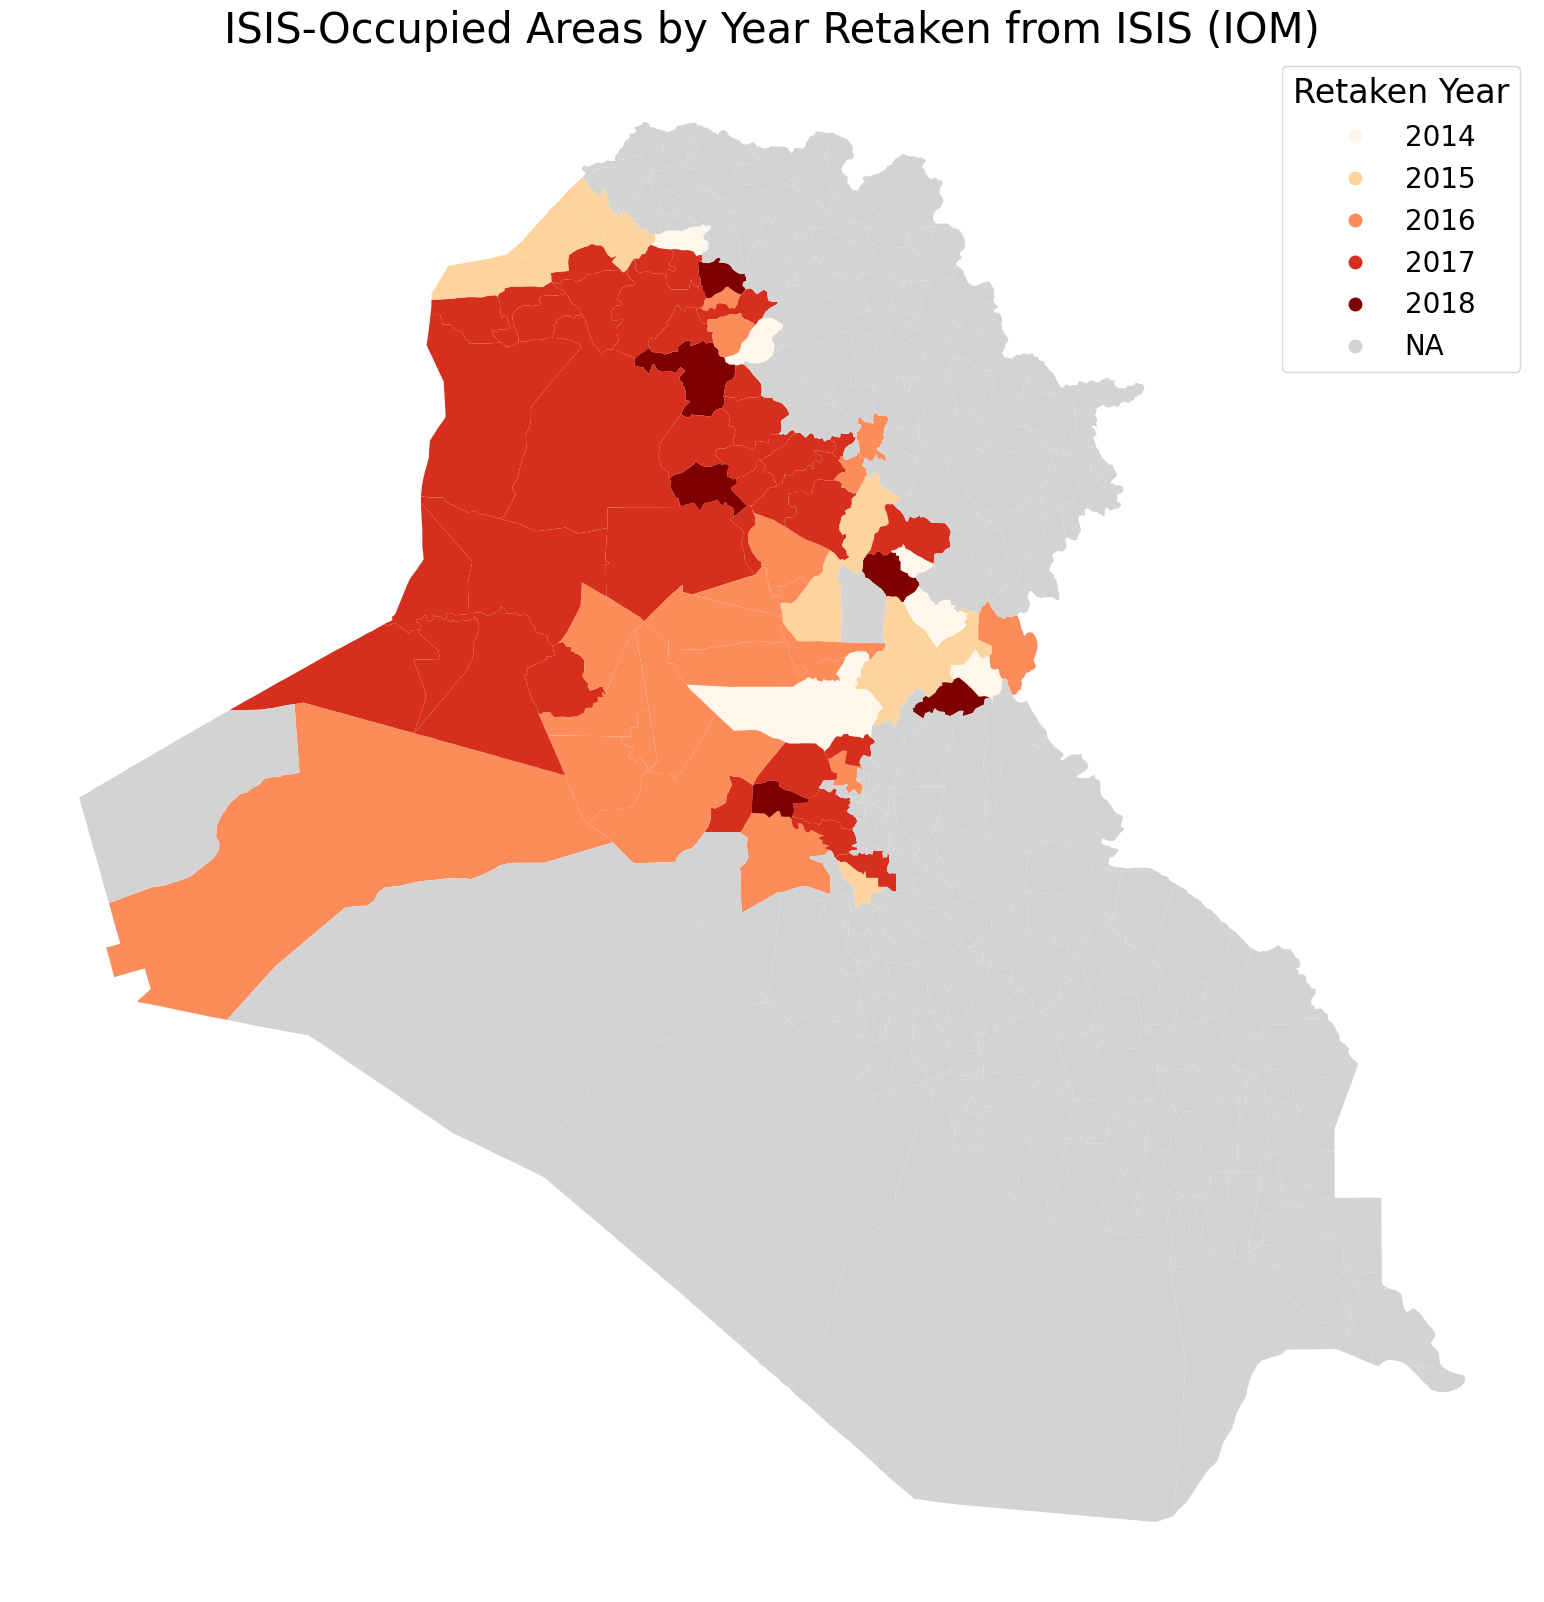

In [172]:
isis_occ_df = month_adm3_data.loc[:,('ADM3_PCODE','ADM3_EN','geometry','iom_occupied','retaken_year')]
isis_occ_df = isis_occ_df.drop_duplicates()
print(isis_occ_df.shape)
isis_occ_df['retaken_year'] = isis_occ_df['retaken_year'].astype('Int64').astype('category')

fig, ax = plt.subplots(1,1,figsize=(20,20))

isis_occ_df.plot(column='retaken_year',legend=True, ax=ax,
                 cmap='OrRd', 
                 missing_kwds={'color':'lightgrey',
                               'label':'NA'},
                 legend_kwds={'fontsize':20,
                              'title':'Retaken Year',
                              'title_fontsize':24})
ax.set_axis_off()
plt.title("ISIS-Occupied Areas by Year Retaken from ISIS (IOM)",fontsize=30)

(294, 4)


Text(0.5, 1.0, 'Areas Reporting ISIS Attack without Occupation (IOM)')

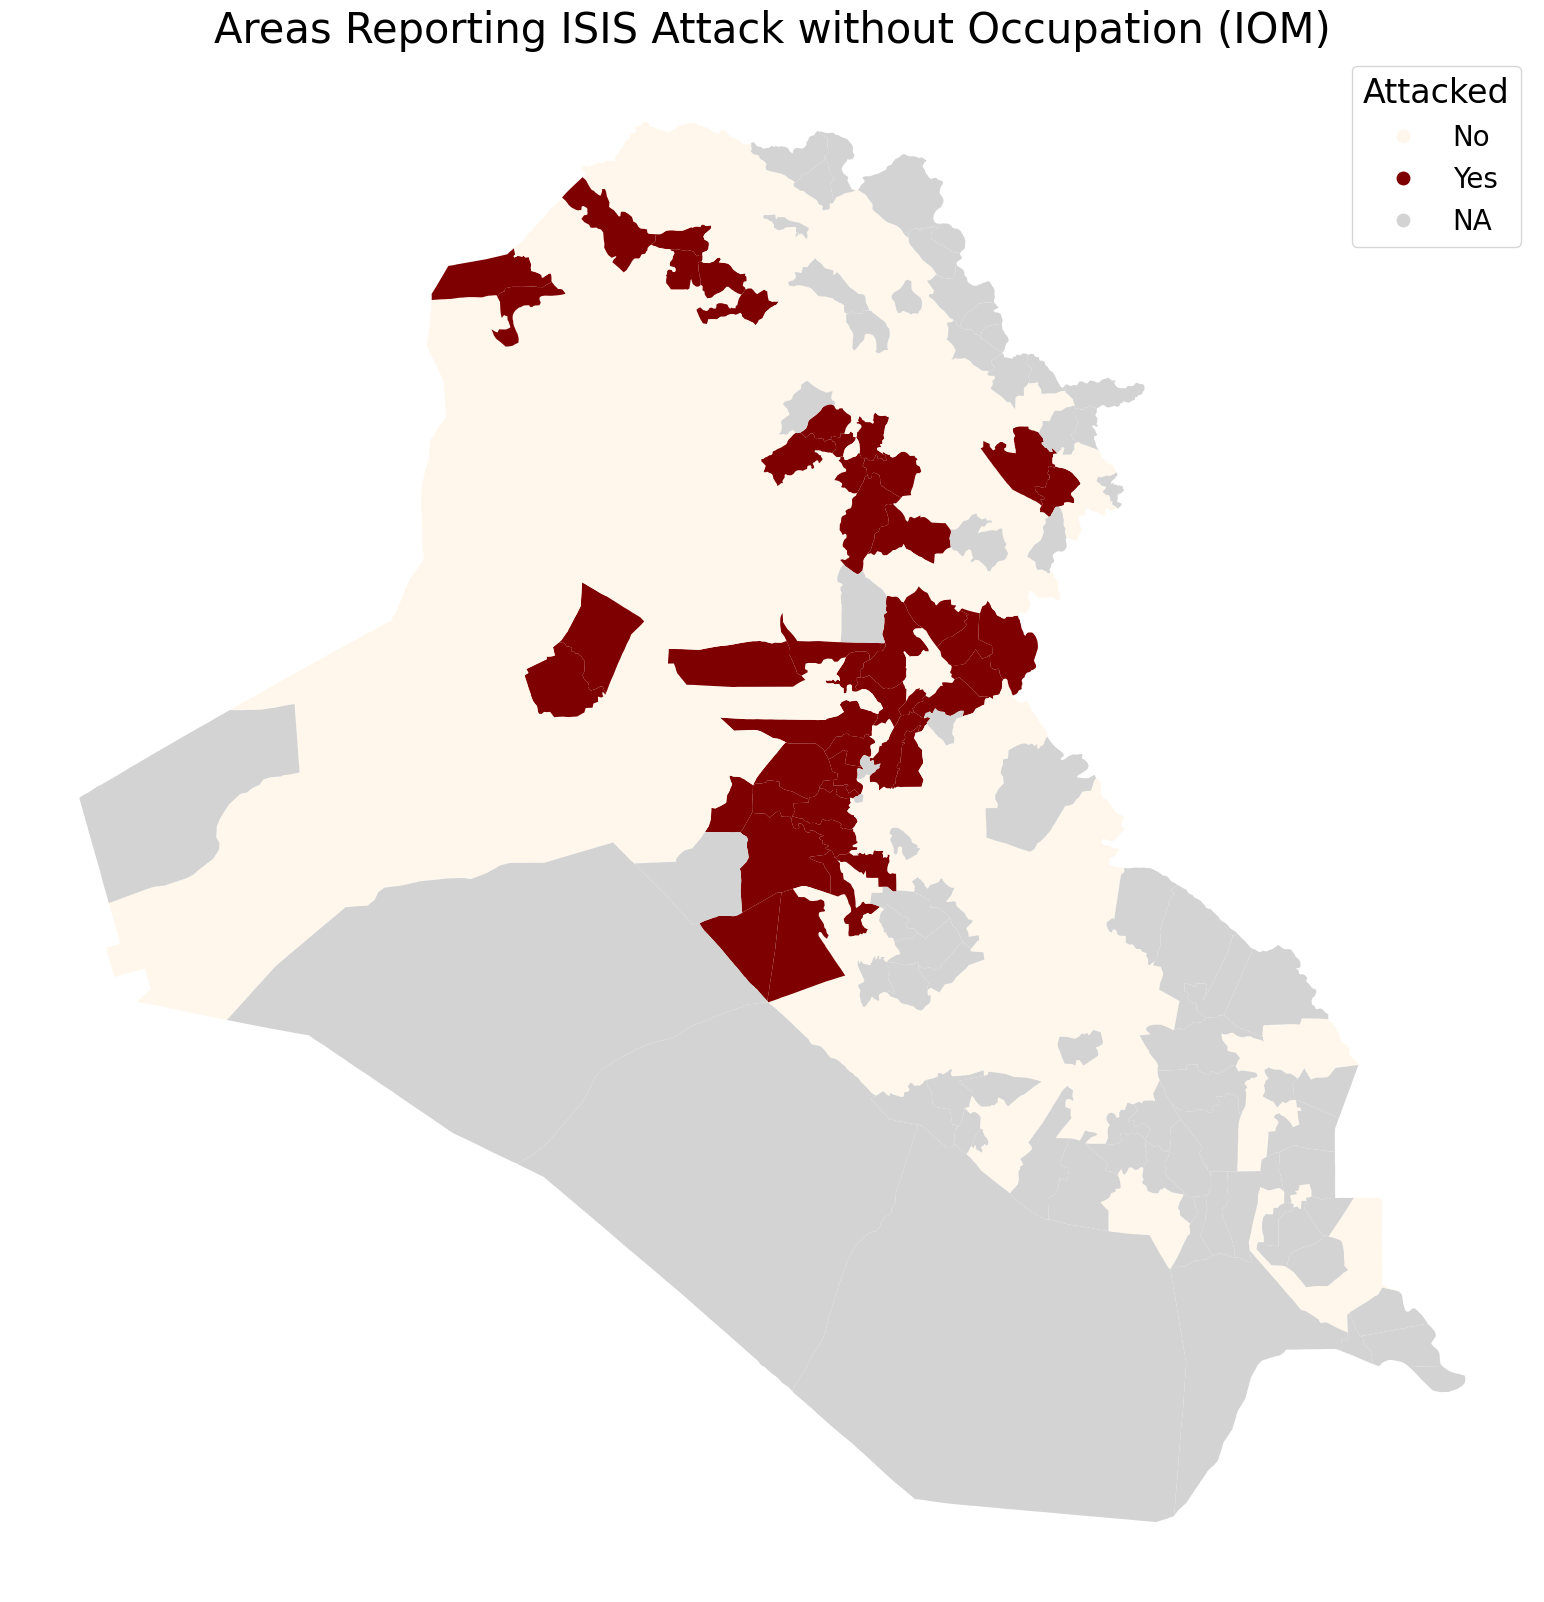

In [174]:
isis_atk_df = month_adm3_data.loc[:,('ADM3_PCODE','ADM3_EN','geometry','iom_attacked')]
isis_atk_df = isis_atk_df.drop_duplicates()
print(isis_atk_df.shape)
isis_atk_df['iom_attacked'] = isis_atk_df['iom_attacked'].astype('Int64').astype('category')

fig, ax = plt.subplots(1,1,figsize=(20,20))

isis_atk_df.plot(column='iom_attacked',legend=True, ax=ax,
                 cmap='OrRd', 
                 missing_kwds={'color':'lightgrey',
                               'label':'NA'},
                 legend_kwds={'fontsize':20, 
                             'title':'Attacked',
                             'title_fontsize':24,
                             'labels':['No','Yes','NA']})
ax.set_axis_off()
plt.title("Areas Reporting ISIS Attack without Occupation (IOM)",fontsize=30)

In [175]:
month_adm3_data.columns

Index(['ADM3_EN', 'month', 'mean_evi', 'mean_evi_scaled', 'max_evi',
       'max_evi_scaled', 'ACTION_IND', 'ACTION_DIR', 'ACTION_PRT', 'pop_count',
       'pop_density', 'disputed_area', 'iom_attacked', 'iom_occupied',
       'isil_ingroup_prior', 'isil_ingroup_curr', 'retaken_year',
       'retaken_post_2016', 'iom_no_isil_action', 'Shape_Area', 'ADM3_AR',
       'ADM3_PCODE', 'ADM2_EN', 'ADM2_AR', 'ADM2_PCODE', 'ADM1_EN', 'ADM1_AR',
       'ADM1_PCODE', 'geometry'],
      dtype='object')

In [176]:
month_adm3_data.head()

,ADM3_EN,month,mean_evi,mean_evi_scaled,max_evi,max_evi_scaled,ACTION_IND,ACTION_DIR,ACTION_PRT,pop_count,...,Shape_Area,ADM3_AR,ADM3_PCODE,ADM2_EN,ADM2_AR,ADM2_PCODE,ADM1_EN,ADM1_AR,ADM1_PCODE,geometry
0,Abi Gharaq,2001-01-31,2886.373490,0.288637,5416.0,0.5416,0.0,0.0,0.0,137199.66,...,0.015754,ابي غرق,IQG01Q05N01,Al-Hilla,الحلة,IQG07Q02,Babil,بابل,IQG07,"POLYGON ((44.36654 32.56190, 44.36466 32.55802..."
1,Abi Gharaq,2001-02-28,3094.206464,0.309421,6291.0,0.6291,0.0,0.0,0.0,137199.66,...,0.015754,ابي غرق,IQG01Q05N01,Al-Hilla,الحلة,IQG07Q02,Babil,بابل,IQG07,"POLYGON ((44.36654 32.56190, 44.36466 32.55802..."
2,Abi Gharaq,2001-03-31,3275.809481,0.327581,6513.0,0.6513,0.0,0.0,0.0,137199.66,...,0.015754,ابي غرق,IQG01Q05N01,Al-Hilla,الحلة,IQG07Q02,Babil,بابل,IQG07,"POLYGON ((44.36654 32.56190, 44.36466 32.55802..."
3,Abi Gharaq,2001-04-30,2596.503366,0.259650,5332.0,0.5332,0.0,0.0,0.0,137199.66,...,0.015754,ابي غرق,IQG01Q05N01,Al-Hilla,الحلة,IQG07Q02,Babil,بابل,IQG07,"POLYGON ((44.36654 32.56190, 44.36466 32.55802..."
4,Abi Gharaq,2001-05-31,2161.217474,0.216122,5147.0,0.5147,0.0,0.0,0.0,137199.66,...,0.015754,ابي غرق,IQG01Q05N01,Al-Hilla,الحلة,IQG07Q02,Babil,بابل,IQG07,"POLYGON ((44.36654 32.56190, 44.36466 32.55802..."


In [177]:
spei_stats_file = source_dir + '/data/drought/gebrechorkos_etal_2023_spei/spei_sums/CHIRPS_GLEAM_03_spei_sums.csv'
spei_stats = pd.read_csv(spei_stats_file)

In [156]:
spei_stats_join = spei_stats.loc[:,('time','mean_spei','max_spei','min_spei','num_drought','num_all','ADM3_EN')]
spei_stats_join['perc_drought_points'] = spei_stats_join['num_drought'] / spei_stats_join['num_all']
spei_stats_join['time'] = pd.to_datetime(spei_stats_join['time'])

spei_stats_join['month'] = spei_stats_join['time'] + pd.offsets.MonthEnd()
spei_stats_join = spei_stats_join.drop(columns=['num_drought','num_all','time'])
spei_stats_join.head(2)

,mean_spei,max_spei,min_spei,ADM3_EN,perc_drought_points,month
0,0.519039,0.618580,0.452093,Abi Gharaq,0.0,2001-01-31
1,0.253003,0.371929,0.133062,Abi Gharaq,0.0,2001-02-28


In [214]:
spei_stats_06_file = source_dir + '/data/drought/gebrechorkos_etal_2023_spei/spei_sums/CHIRPS_GLEAM_06_spei_sums.csv'
spei_stats_06 = pd.read_csv(spei_stats_06_file)

In [215]:
spei_stats_06_join = spei_stats_06.loc[:,('time','mean_spei','max_spei','min_spei','num_drought','num_all','ADM3_EN')]
spei_stats_06_join['perc_drought_points'] = spei_stats_06_join['num_drought'] / spei_stats_06_join['num_all']
spei_stats_06_join['time'] = pd.to_datetime(spei_stats_06_join['time'])

spei_stats_06_join['month'] = spei_stats_06_join['time'] + pd.offsets.MonthEnd()
spei_stats_06_join = spei_stats_06_join.drop(columns=['num_drought','num_all','time'])
spei_stats_06_join.head(2)

,mean_spei,max_spei,min_spei,ADM3_EN,perc_drought_points,month
0,0.486990,0.549631,0.437758,Abi Gharaq,0.0,2001-01-31
1,0.669402,0.723641,0.629899,Abi Gharaq,0.0,2001-02-28


In [193]:
spei_stats_mswepgleam_06_file = source_dir + '/data/drought/gebrechorkos_etal_2023_spei/spei_sums/MSWEP_GLEAM_06_spei_sums.csv'
spei_stats_06_mswepgleam = pd.read_csv(spei_stats_mswepgleam_06_file)
spei_stats_06_mswepgleam_join = spei_stats_06_mswepgleam.loc[:,('time','mean_spei','max_spei','min_spei','num_drought','num_all','ADM3_EN')]
spei_stats_06_mswepgleam_join['perc_drought_points'] = spei_stats_06_mswepgleam_join['num_drought'] / spei_stats_06_mswepgleam_join['num_all']
spei_stats_06_mswepgleam_join['time'] = pd.to_datetime(spei_stats_06_mswepgleam_join['time'])

spei_stats_06_mswepgleam_join['month'] = spei_stats_06_mswepgleam_join['time'] + pd.offsets.MonthEnd()
spei_stats_06_mswepgleam_join = spei_stats_06_mswepgleam_join.drop(columns=['num_drought','num_all','time'])
spei_stats_06_mswepgleam_join.head(2)

,mean_spei,max_spei,min_spei,ADM3_EN,perc_drought_points,month
0,0.616863,0.819505,0.354207,Abi Gharaq,0.0,2001-01-31
1,0.504521,0.688387,0.235123,Abi Gharaq,0.0,2001-02-28


In [201]:
spei_stats_chiprshpet_06_file = source_dir + '/data/drought/gebrechorkos_etal_2023_spei/spei_sums/CHIRPS_hPET_06_spei_sums.csv'
spei_stats_06_chiprshpet = pd.read_csv(spei_stats_chiprshpet_06_file)
spei_stats_06_chiprshpet_join = spei_stats_06_chiprshpet.loc[:,('time','mean_spei','max_spei','min_spei','num_drought','num_all','ADM3_EN')]
spei_stats_06_chiprshpet_join['perc_drought_points'] = spei_stats_06_chiprshpet_join['num_drought'] / spei_stats_06_chiprshpet_join['num_all']
spei_stats_06_chiprshpet_join['time'] = pd.to_datetime(spei_stats_06_chiprshpet_join['time'])

spei_stats_06_chiprshpet_join['month'] = spei_stats_06_chiprshpet_join['time'] + pd.offsets.MonthEnd()
spei_stats_06_chiprshpet_join = spei_stats_06_chiprshpet_join.drop(columns=['num_drought','num_all','time'])
spei_stats_06_chiprshpet_join.head(2)

,mean_spei,max_spei,min_spei,ADM3_EN,perc_drought_points,month
0,0.486990,0.549631,0.437758,Abi Gharaq,0.0,2001-01-31
1,0.669402,0.723641,0.629899,Abi Gharaq,0.0,2001-02-28


In [210]:
spei_stats_mswephpet_06_file = source_dir + '/data/drought/gebrechorkos_etal_2023_spei/spei_sums/MSWEP_hPET_06_spei_sums.csv'
spei_stats_06_mswephpet = pd.read_csv(spei_stats_mswephpet_06_file)
spei_stats_06_mswephpet_join = spei_stats_06_mswephpet.loc[:,('time','mean_spei','max_spei','min_spei','num_drought','num_all','ADM3_EN')]
spei_stats_06_mswephpet_join['perc_drought_points'] = spei_stats_06_mswephpet_join['num_drought'] / spei_stats_06_mswephpet_join['num_all']
spei_stats_06_mswephpet_join['time'] = pd.to_datetime(spei_stats_06_mswephpet_join['time'])

spei_stats_06_mswephpet_join['month'] = spei_stats_06_mswephpet_join['time'] + pd.offsets.MonthEnd()
spei_stats_06_mswephpet_join = spei_stats_06_mswephpet_join.drop(columns=['num_drought','num_all','time'])
spei_stats_06_mswephpet_join.head(2)

,mean_spei,max_spei,min_spei,ADM3_EN,perc_drought_points,month
0,0.703839,0.800843,0.562761,Abi Gharaq,0.0,2001-01-31
1,0.834734,0.913563,0.711931,Abi Gharaq,0.0,2001-02-28


In [216]:
static_prepost_comp_df = month_adm3_data.loc[:,('ADM3_EN', 'month', 'mean_evi', 'mean_evi_scaled', 
                                                'max_evi','max_evi_scaled','disputed_area', 'iom_attacked', 
                                                'iom_occupied', 'isil_ingroup_prior', 'isil_ingroup_curr', 
                                                'retaken_year','retaken_post_2016', 'iom_no_isil_action',
                                                'geometry')]
print(static_prepost_comp_df.shape)
static_prepost_comp_df = static_prepost_comp_df.merge(spei_stats_06_join,on=['month','ADM3_EN'],how='left')
print(static_prepost_comp_df.shape)

(77616, 15)
(77616, 19)


In [217]:
# calculate the residuals of evi predicted by SPEI 
static_prepost_comp_forreg = static_prepost_comp_df[~static_prepost_comp_df.loc[:,('mean_evi_scaled','max_evi_scaled','mean_spei','perc_drought_points')].isna().any(axis=1)]
y_mean_evi = static_prepost_comp_forreg['mean_evi_scaled'].to_numpy()
y_mean_evi = y_mean_evi.reshape(static_prepost_comp_forreg.shape[0],1)
X_spei = static_prepost_comp_forreg.loc[:,('mean_spei','max_spei','min_spei')].to_numpy()

mean_evi_spei_lm = LinearRegression().fit(X_spei, y_mean_evi)
y_pred_mean_evi = mean_evi_spei_lm.predict(X_spei)

In [94]:
# https://stackoverflow.com/questions/26319259/how-to-get-a-regression-summary-in-scikit-learn-like-r-does?rq=3
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print("Median Absolute Error", round(median_absolute_error,4))
    print('RMSE: ', round(np.sqrt(mse),4))


In [136]:
# results from 3-mo SPEI
regression_results(y_mean_evi,y_pred_mean_evi)

explained_variance:  0.0189
r2:  0.0189
MAE:  0.0617
MSE:  0.0062
Median Absolute Error 0.0528
RMSE:  0.0787


In [218]:
# results from 6-mo CHIRPS_GLEAM SPEI - slightly better than 3-mo SPEI 
regression_results(y_mean_evi,y_pred_mean_evi)

explained_variance:  0.0336
r2:  0.0336
MAE:  0.0613
MSE:  0.0061
Median Absolute Error 0.0525
RMSE:  0.078


In [196]:
# results from MSWEP GLEAMS 6-mo SPEI - worse than 6 mo CHIRPS_GLEAM 
regression_results(y_mean_evi,y_pred_mean_evi)

explained_variance:  0.0251
r2:  0.0251
MAE:  0.0614
MSE:  0.0061
Median Absolute Error 0.0525
RMSE:  0.0781


In [204]:
# results from CHIRPS hPET 6-mo SPEI - same as 6 mo CHIRPS GLEAM 
regression_results(y_mean_evi,y_pred_mean_evi)

explained_variance:  0.0336
r2:  0.0336
MAE:  0.0613
MSE:  0.0061
Median Absolute Error 0.0525
RMSE:  0.078


In [213]:
# results from MSWEP hPET 6-mo SPEI - worse than 6 mo CHIRPS_GLEAM 
regression_results(y_mean_evi,y_pred_mean_evi)

explained_variance:  0.027
r2:  0.027
MAE:  0.0613
MSE:  0.0061
Median Absolute Error 0.0525
RMSE:  0.078


In [219]:
# calculate the residuals of evi predicted by SPEI 
static_prepost_comp_forreg = static_prepost_comp_df[~static_prepost_comp_df.loc[:,('mean_evi_scaled','max_evi_scaled','mean_spei','perc_drought_points')].isna().any(axis=1)]

y_max_evi = static_prepost_comp_forreg['max_evi_scaled'].to_numpy()
y_max_evi = y_max_evi.reshape(static_prepost_comp_forreg.shape[0],1)
X_spei = static_prepost_comp_forreg.loc[:,('mean_spei','max_spei','min_spei')].to_numpy()

max_evi_spei_lm = LinearRegression().fit(X_spei, y_max_evi)
y_pred_max_evi = max_evi_spei_lm.predict(X_spei)

In [ ]:
# results from 3-mo SPEI - worse than the 6 mon max predictions
regression_results(y_max_evi,y_pred_max_evi)

In [221]:
# results from 6-mo SPEI - higher error than predicting mean evi, but also slightly higher r2
regression_results(y_max_evi,y_pred_max_evi)

explained_variance:  0.0398
r2:  0.0398
MAE:  0.1196
MSE:  0.0227
Median Absolute Error 0.0992
RMSE:  0.1506


In [222]:
# get residuals from mean evi predictions
static_prepost_comp_forreg['mean_evi_pred_resids'] = y_mean_evi - y_pred_mean_evi

/home/npodpx/.virtualenvs/iraq_postconflict/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [223]:
static_prepost_comp_forreg['max_evi_pred_resids'] = y_max_evi - y_pred_max_evi

/home/npodpx/.virtualenvs/iraq_postconflict/lib/python3.9/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [224]:
reg_rejoin = static_prepost_comp_forreg.loc[:,('ADM3_EN','month','mean_evi_pred_resids','max_evi_pred_resids')]

In [225]:
print(static_prepost_comp_df.shape)
static_prepost_comp_df = static_prepost_comp_df.merge(reg_rejoin, on=['ADM3_EN','month'],how='left')
print(static_prepost_comp_df.shape)

(77616, 19)
(77616, 21)


In [255]:
static_prepost_comp_df['month_name'] = static_prepost_comp_df['month'].dt.month_name()
static_prepost_comp_df['iom_attacked'] = static_prepost_comp_df['iom_attacked'].astype('object')
static_prepost_comp_df['iom_occupied'] = static_prepost_comp_df['iom_occupied'].astype('object')
static_prepost_comp_df['iom_no_isil_action'] = static_prepost_comp_df['iom_no_isil_action'].astype('object')
static_prepost_comp_df['retaken_post_2016'] = static_prepost_comp_df['retaken_post_2016'].astype('object')

static_pre_isis = static_prepost_comp_df[static_prepost_comp_df['month']<= '2014-01-01']
static_post_isis = static_prepost_comp_df[static_prepost_comp_df['month']>= '2018-01-01']

In [271]:
static_pre_isis_mongb = static_pre_isis.groupby(['month_name','ADM3_EN','iom_attacked','iom_occupied',
                                                 'retaken_year','retaken_post_2016','iom_no_isil_action'],
                                                 dropna=False)[['mean_evi_scaled','max_evi_scaled','mean_evi_pred_resids','max_evi_pred_resids']].mean()
static_pre_isis_mongb

mean_evi_scaled  \
month_name ADM3_EN    iom_attacked iom_occupied retaken_year retaken_post_2016 iom_no_isil_action                    
April      Abi Gharaq 0.0          0.0          NaN          NaN               1.0                        0.238026   
           Abu Dalf   0.0          1.0          2015.0       0.0               0.0                        0.209478   
           Abu Ghraib 1.0          1.0          2017.0       1.0               0.0                        0.250394   
           Agjalare   0.0          0.0          NaN          NaN               1.0                        0.302203   
           Akaika     0.0          0.0          NaN          NaN               1.0                        0.185458   
...                                                                                                            ...   
September  Wasit      0.0          0.0          NaN          NaN               1.0                        0.154127   
           Yaijy      0.0          0.0          NaN          NaN               1.0                        0.132854   
           Yathreb    0.0          1.0          2014.0       0.0               0.0                        0.263724   
           Zawita     0.0          0.0          NaN          NaN               1.0                        0.179587   
           Zummar     1.0          1.0          2015.0       0.0               0.0                        0.101372   

                                                                                                   max_evi_scaled  \
month_name ADM3_EN    iom_attacked iom_occupied retaken_year retaken_post_2016 iom_no_isil_action                   
April      Abi Gharaq 0.0          0.0          NaN          NaN               1.0                       0.449600   
           Abu Dalf   0.0          1.0          2015.0       0.0               0.0                       0.320050   
           Abu Ghraib 1.0          1.0          2017.0       1.0               0.0                       0.534185   
           Agjalare   0.0          0.0          NaN          NaN               1.0                       0.588808   
           Akaika     0.0          0.0          NaN          NaN               1.0                       0.400354   
...                                                                                                           ...   
September  Wasit      0.0          0.0          NaN          NaN               1.0                       0.482423   
           Yaijy      0.0          0.0          NaN          NaN               1.0                       0.394992   
           Yathreb    0.0          1.0          2014.0       0.0               0.0                       0.579346   
           Zawita     0.0          0.0          NaN          NaN               1.0                       0.476492   
           Zummar     1.0          1.0          2015.0       0.0               0.0                       0.645831   

                                                                                                   mean_evi_pred_resids  \
month_name ADM3_EN    iom_attacked iom_occupied retaken_year retaken_post_2016 iom_no_isil_action                         
April      Abi Gharaq 0.0          0.0          NaN          NaN               1.0                             0.042006   
           Abu Dalf   0.0          1.0          2015.0       0.0               0.0                            -0.004640   
           Abu Ghraib 1.0          1.0          2017.0       1.0               0.0                             0.054156   
           Agjalare   0.0          0.0          NaN          NaN               1.0                             0.102826   
           Akaika     0.0          0.0          NaN          NaN               1.0                            -0.013397   
...                                                                                                                 ...   
September  Wasit      0.0          0.0          NaN       

In [272]:
static_post_isis_mongb = static_post_isis.groupby(['month_name','ADM3_EN','iom_attacked','iom_occupied',
                                                   'retaken_year','retaken_post_2016','iom_no_isil_action'],
                                                   dropna=False)[['mean_evi_scaled','max_evi_scaled','mean_evi_pred_resids','max_evi_pred_resids']].mean()
static_post_isis_mongb

mean_evi_scaled  \
month_name ADM3_EN    iom_attacked iom_occupied retaken_year retaken_post_2016 iom_no_isil_action                    
April      Abi Gharaq 0.0          0.0          NaN          NaN               1.0                        0.267169   
           Abu Dalf   0.0          1.0          2015.0       0.0               0.0                        0.295464   
           Abu Ghraib 1.0          1.0          2017.0       1.0               0.0                        0.273469   
           Agjalare   0.0          0.0          NaN          NaN               1.0                        0.290585   
           Akaika     0.0          0.0          NaN          NaN               1.0                        0.174172   
...                                                                                                            ...   
September  Wasit      0.0          0.0          NaN          NaN               1.0                        0.110946   
           Yaijy      0.0          0.0          NaN          NaN               1.0                        0.235293   
           Yathreb    0.0          1.0          2014.0       0.0               0.0                        0.248860   
           Zawita     0.0          0.0          NaN          NaN               1.0                        0.187701   
           Zummar     1.0          1.0          2015.0       0.0               0.0                        0.104108   

                                                                                                   max_evi_scaled  \
month_name ADM3_EN    iom_attacked iom_occupied retaken_year retaken_post_2016 iom_no_isil_action                   
April      Abi Gharaq 0.0          0.0          NaN          NaN               1.0                        0.50892   
           Abu Dalf   0.0          1.0          2015.0       0.0               0.0                        0.59408   
           Abu Ghraib 1.0          1.0          2017.0       1.0               0.0                        0.60726   
           Agjalare   0.0          0.0          NaN          NaN               1.0                        0.61860   
           Akaika     0.0          0.0          NaN          NaN               1.0                        0.36224   
...                                                                                                           ...   
September  Wasit      0.0          0.0          NaN          NaN               1.0                        0.45756   
           Yaijy      0.0          0.0          NaN          NaN               1.0                        0.67358   
           Yathreb    0.0          1.0          2014.0       0.0               0.0                        0.56022   
           Zawita     0.0          0.0          NaN          NaN               1.0                        0.43364   
           Zummar     1.0          1.0          2015.0       0.0               0.0                        0.56756   

                                                                                                   mean_evi_pred_resids  \
month_name ADM3_EN    iom_attacked iom_occupied retaken_year retaken_post_2016 iom_no_isil_action                         
April      Abi Gharaq 0.0          0.0          NaN          NaN               1.0                             0.064489   
           Abu Dalf   0.0          1.0          2015.0       0.0               0.0                             0.087213   
           Abu Ghraib 1.0          1.0          2017.0       1.0               0.0                             0.073830   
           Agjalare   0.0          0.0          NaN          NaN               1.0                             0.090880   
           Akaika     0.0          0.0          NaN          NaN               1.0                            -0.027571   
...                                                                                                                 ...   
September  Wasit      0.0          0.0          NaN       

In [273]:
prepost_mon_avg = static_pre_isis_mongb.join(static_post_isis_mongb,lsuffix='_pre',rsuffix='_post')
prepost_mon_avg = prepost_mon_avg.reset_index()
prepost_mon_avg['mean_evi_scaled_diff'] = prepost_mon_avg['mean_evi_scaled_post'] - prepost_mon_avg['mean_evi_scaled_pre']
prepost_mon_avg['max_evi_scaled_diff'] = prepost_mon_avg['max_evi_scaled_post'] - prepost_mon_avg['max_evi_scaled_pre']
prepost_mon_avg['mean_evi_pred_resids_diff'] = prepost_mon_avg['mean_evi_pred_resids_post'] - prepost_mon_avg['mean_evi_pred_resids_pre']
prepost_mon_avg['max_evi_pred_resids_diff'] = prepost_mon_avg['max_evi_pred_resids_post'] - prepost_mon_avg['max_evi_pred_resids_pre']
prepost_mon_avg

,month_name,ADM3_EN,iom_attacked,iom_occupied,retaken_year,retaken_post_2016,iom_no_isil_action,mean_evi_scaled_pre,max_evi_scaled_pre,mean_evi_pred_resids_pre,max_evi_pred_resids_pre,mean_evi_scaled_post,max_evi_scaled_post,mean_evi_pred_resids_post,max_evi_pred_resids_post,mean_evi_scaled_diff,max_evi_scaled_diff,mean_evi_pred_resids_diff,max_evi_pred_resids_diff
0,April,Abi Gharaq,0.0,0.0,NaN,NaN,1.0,0.238026,0.449600,0.042006,-0.004581,0.267169,0.50892,0.064489,0.035651,0.029143,0.059320,0.022484,0.040232
1,April,Abu Dalf,0.0,1.0,2015.0,0.0,0.0,0.209478,0.320050,-0.004640,-0.197561,0.295464,0.59408,0.087213,0.071575,0.085987,0.274030,0.091853,0.269136
2,April,Abu Ghraib,1.0,1.0,2017.0,1.0,0.0,0.250394,0.534185,0.054156,0.073186,0.273469,0.60726,0.073830,0.119786,0.023074,0.073075,0.019674,0.046599
3,April,Agjalare,0.0,0.0,NaN,NaN,1.0,0.302203,0.588808,0.102826,0.118563,0.290585,0.61860,0.090880,0.136553,-0.011618,0.029792,-0.011946,0.017990
4,April,Akaika,0.0,0.0,NaN,NaN,1.0,0.185458,0.400354,-0.013397,-0.064101,0.174172,0.36224,-0.027571,-0.110219,-0.011286,-0.038114,-0.014174,-0.046118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3523,September,Wasit,0.0,0.0,NaN,NaN,1.0,0.154127,0.482423,-0.044581,0.011232,0.110946,0.45756,-0.090610,0.003430,-0.043181,-0.024863,-0.046029,-0.007802
3524,September,Yaijy,0.0,0.0,NaN,NaN,1.0,0.132854,0.394992,-0.069757,-0.072322,0.235293,0.67358,0.018833,0.202251,0.102439,0.278588,0.088590,0.274573
3525,September,Yathreb,0.0,1.0,2014.0,0.0,0.0,0.263724,0.579346,0.063801,0.114657,0.248860,0.56022,0.038483,0.073940,-0.014864,-0.019126,-0.025318,-0.040717
3526,September,Zawita,0.0,0.0,NaN,NaN,1.0,0.179587,0.476492,-0.025924,-0.003137,0.187701,0.43364,-0.014231,-0.033773,0.008114,-0.042852,0.011692,-0.030637


In [277]:
prepost_mon_avg['isis_activity'] = np.where(prepost_mon_avg['iom_occupied']==1,'Occupied',
                                                   np.where(prepost_mon_avg['iom_attacked']==1,'Attacked',
                                                    np.where(prepost_mon_avg['iom_no_isil_action']==1,'No ISIS Action',
                                                    'No IOM Data')))
#prepost_mon_avg = prepost_mon_avg.drop(columns=['iom_attacked','iom_occupied','iom_no_isil_action',
#                                                'retaken_year'])
prepost_mon_avg['month_name'] = pd.Categorical(prepost_mon_avg['month_name'],
                                               categories=['January','February','March','April',
                                               'May','June','July','August','September','October','November','December'],
                                               ordered=True)

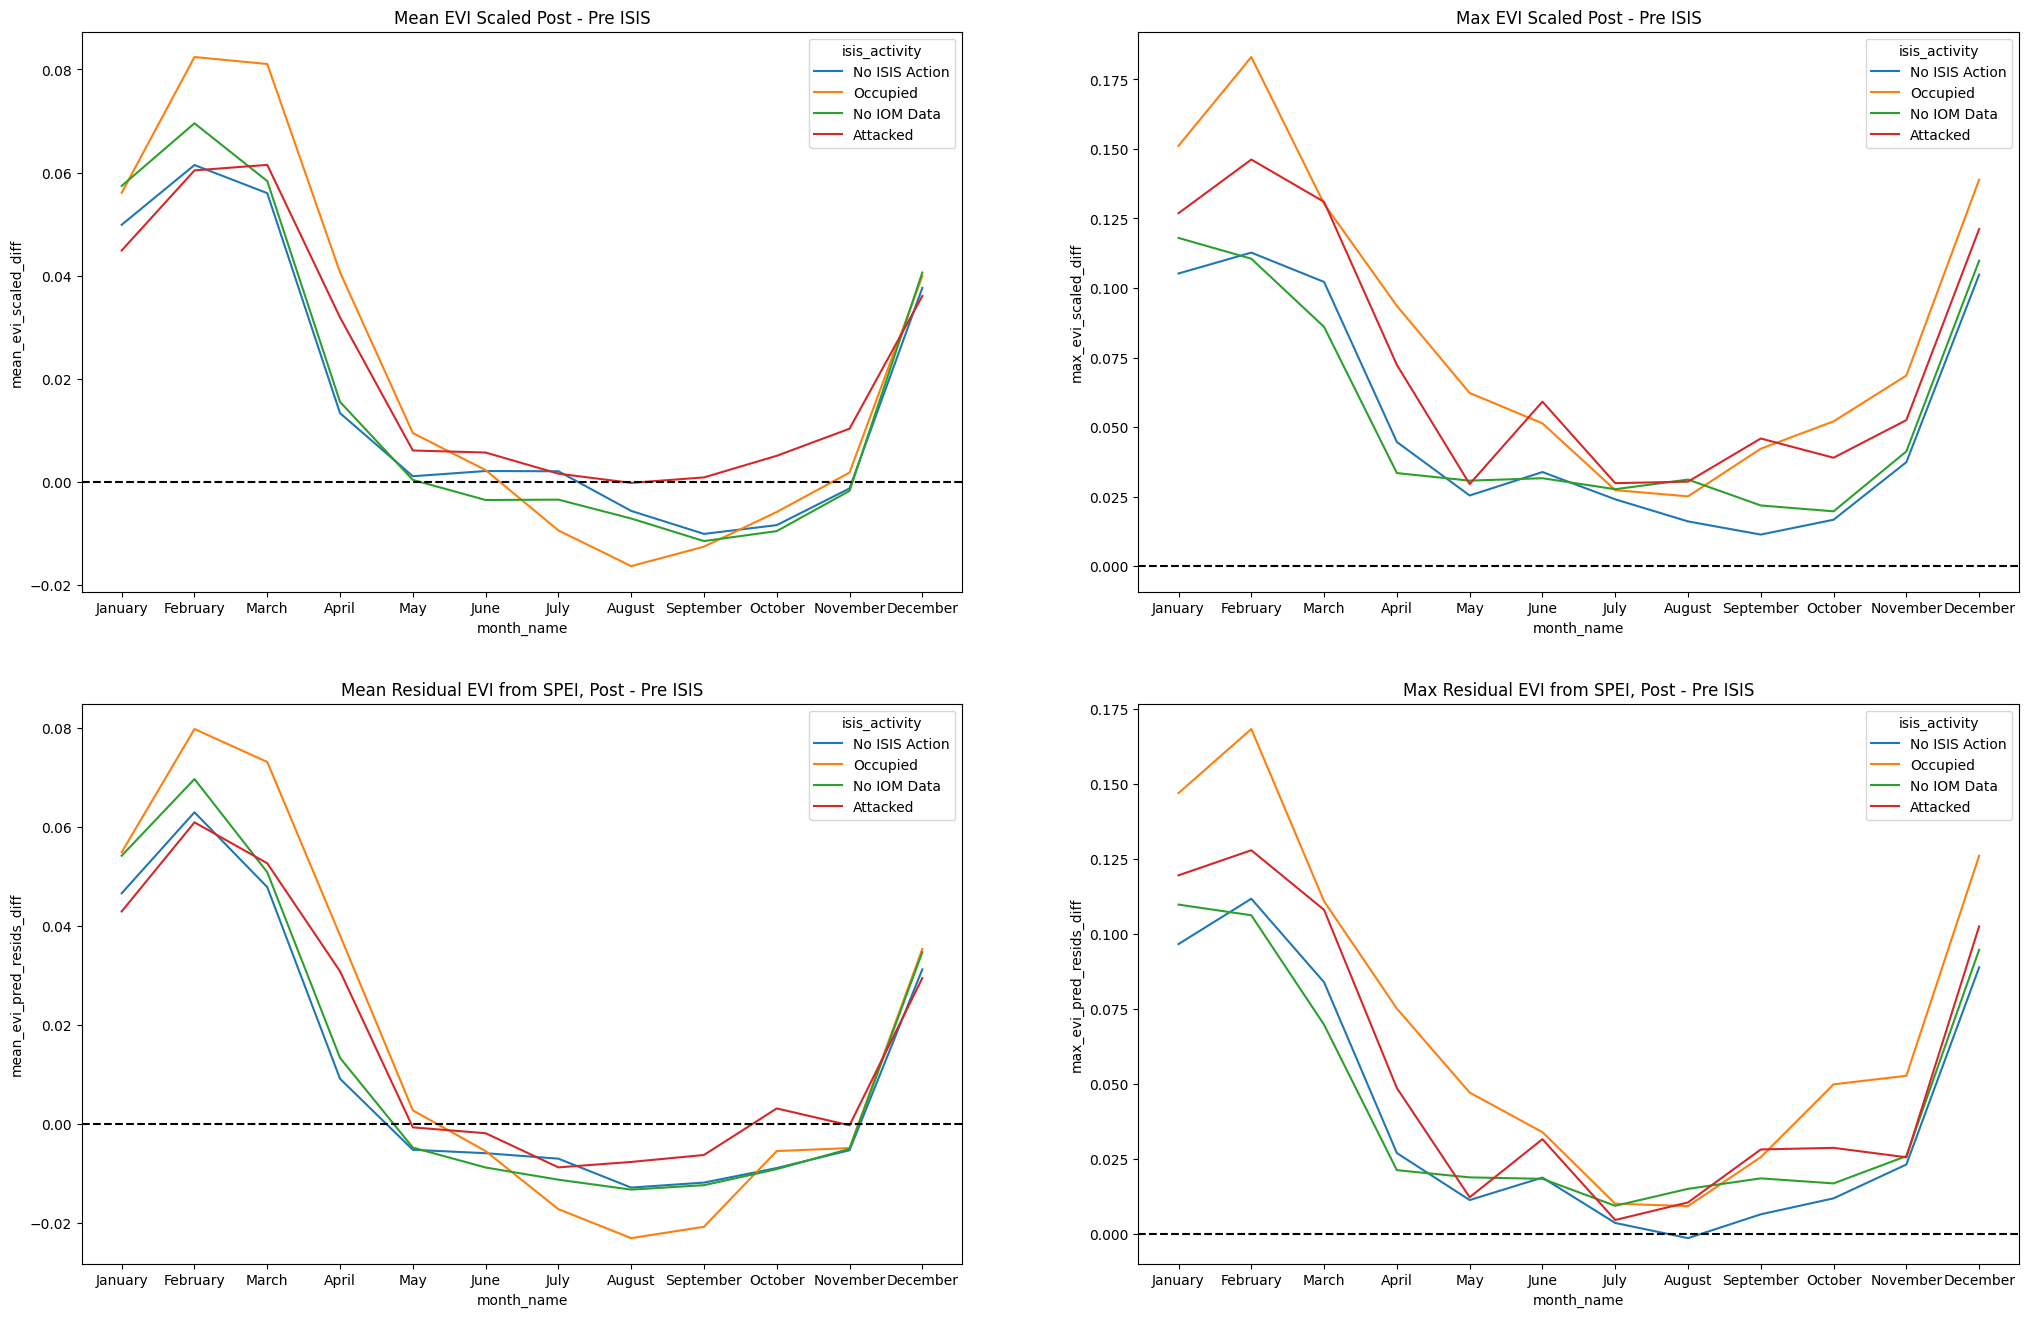

In [286]:

fig, axes = plt.subplots(2,2,figsize=(25,16))

sns.lineplot(ax=axes[0,0],x='month_name', 
             y='mean_evi_scaled_diff',
             data=prepost_mon_avg,
             hue='isis_activity',errorbar=None,
             ).set_title('Mean EVI Scaled Post - Pre ISIS')
axes[0,0].axhline(y=0,linestyle='dashed',color='black')

sns.lineplot(ax=axes[0,1],x='month_name', 
             y='max_evi_scaled_diff',
             data=prepost_mon_avg,
             hue='isis_activity',errorbar=None).set_title('Max EVI Scaled Post - Pre ISIS')
axes[0,1].axhline(y=0,linestyle='dashed',color='black')

sns.lineplot(ax=axes[1,0],x='month_name', 
             y='mean_evi_pred_resids_diff',
             data=prepost_mon_avg,
             hue='isis_activity',errorbar=None).set_title('Mean Residual EVI from SPEI, Post - Pre ISIS')
axes[1,0].axhline(y=0,linestyle='dashed',color='black')

sns.lineplot(ax=axes[1,1],x='month_name', 
             y='max_evi_pred_resids_diff',
             data=prepost_mon_avg,
             hue='isis_activity',errorbar=None).set_title('Max Residual EVI from SPEI, Post - Pre ISIS')
axes[1,1].axhline(y=0,linestyle='dashed',color='black')


Text(0.5, 1.0, 'Mean Residual EVI from SPEI, Post - Pre ISIS')

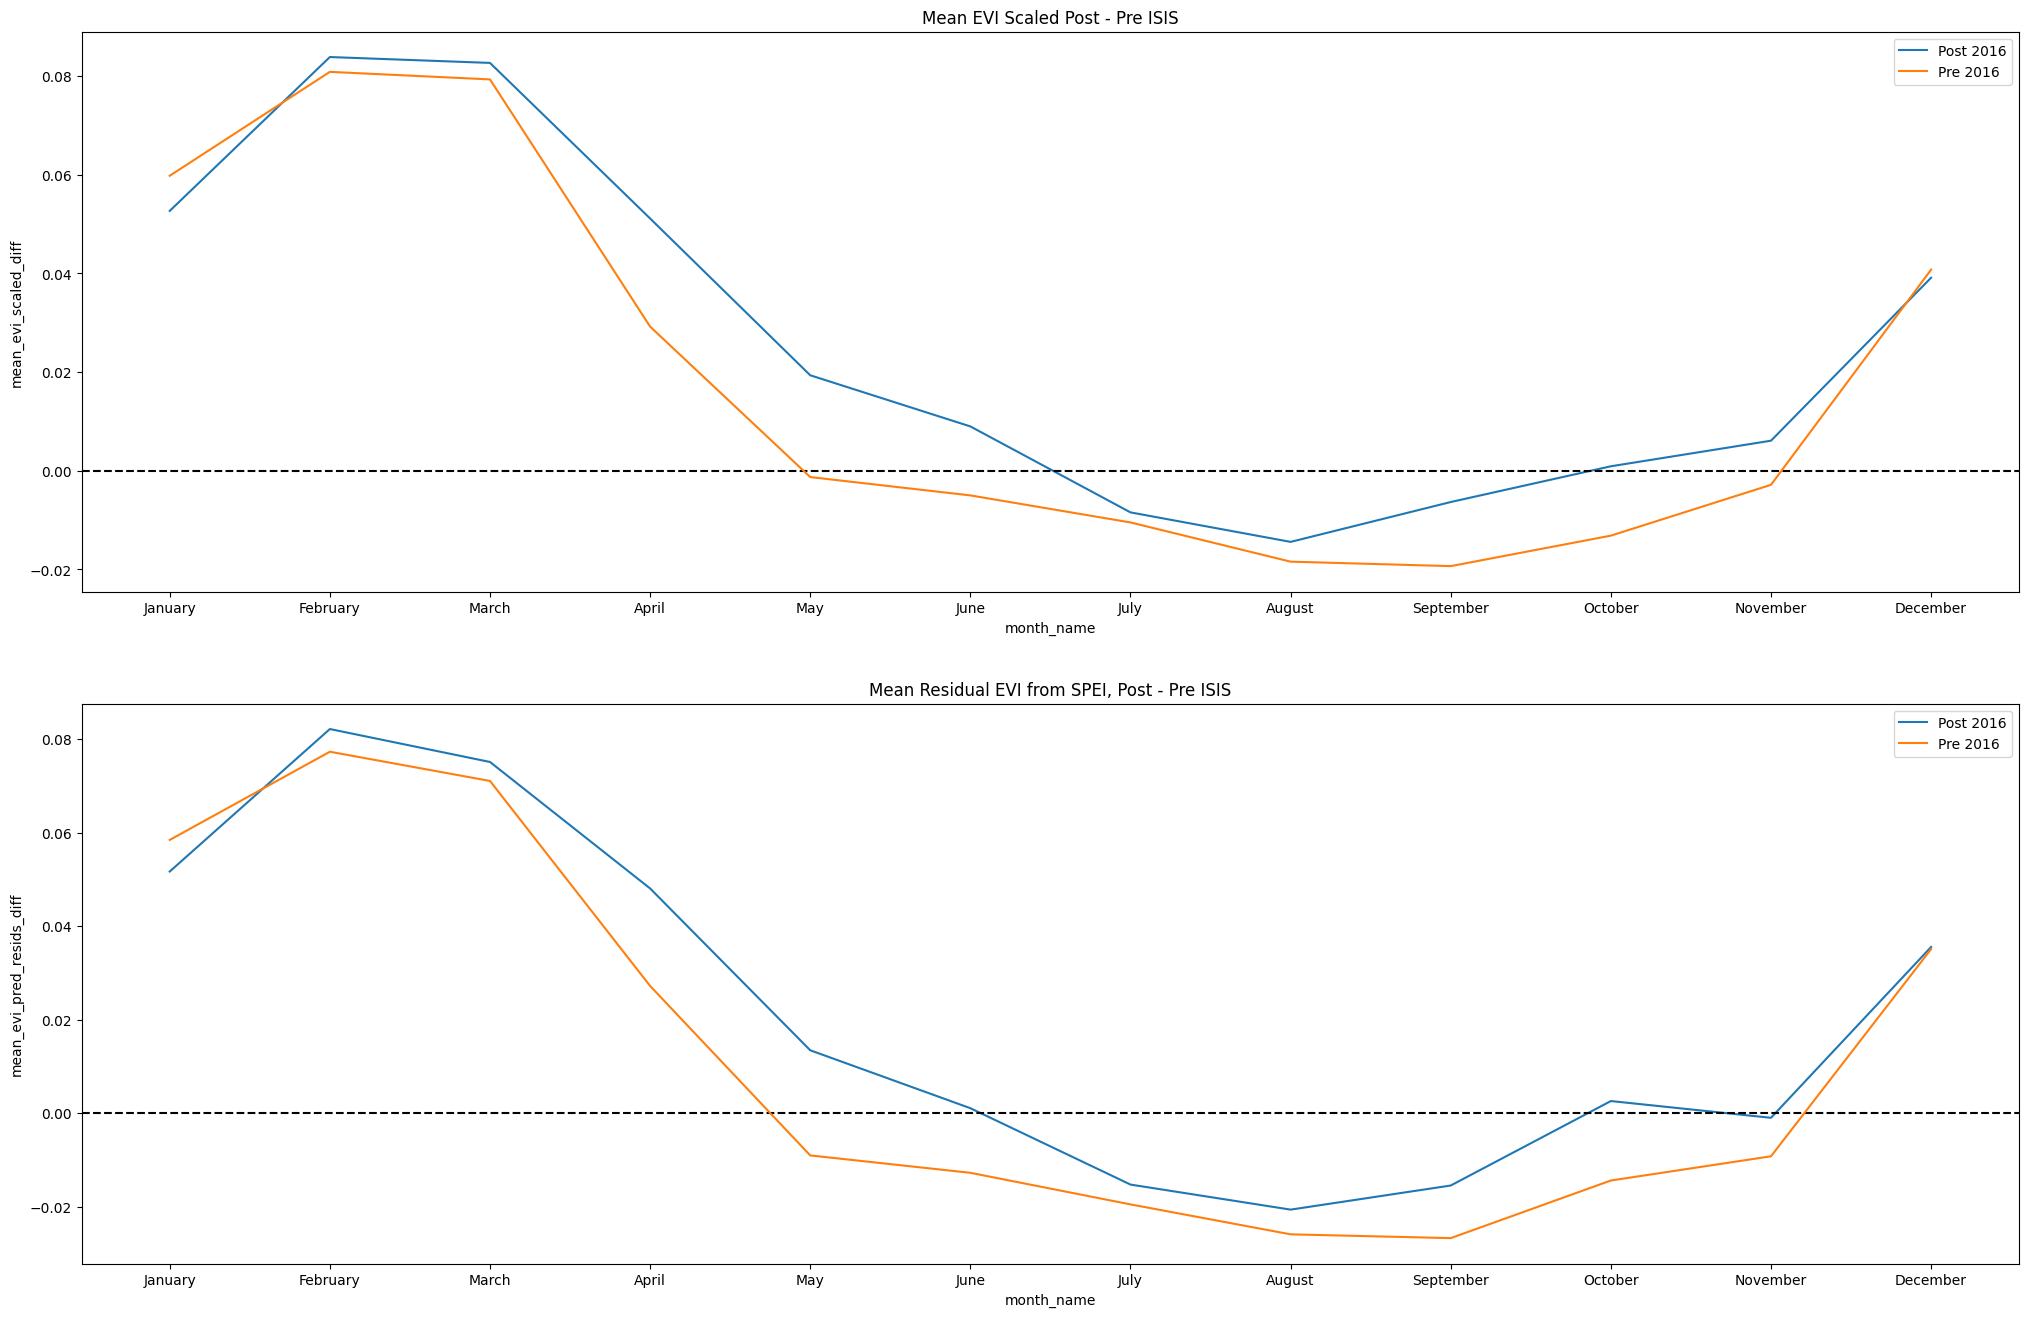

In [293]:
fig, axes = plt.subplots(2,1,figsize=(25,16))

sns.lineplot(ax=axes[0],x='month_name', 
             y='mean_evi_scaled_diff',
             data=prepost_mon_avg[prepost_mon_avg['retaken_post_2016']==1],
             label='Post 2016',errorbar=None,
             ).set_title('Mean EVI Scaled Post - Pre ISIS')
axes[0].axhline(y=0,linestyle='dashed',color='black')

sns.lineplot(ax=axes[0],x='month_name', 
             y='mean_evi_scaled_diff',
             data=prepost_mon_avg[prepost_mon_avg['retaken_post_2016']==0],
             label='Pre 2016',errorbar=None,
             ).set_title('Mean EVI Scaled Post - Pre ISIS')

sns.lineplot(ax=axes[1],x='month_name', 
             y='mean_evi_pred_resids_diff',
             data=prepost_mon_avg[prepost_mon_avg['retaken_post_2016']==1],
             label='Post 2016',errorbar=None).set_title('Mean Residual EVI from SPEI, Post - Pre ISIS')
axes[1].axhline(y=0,linestyle='dashed',color='black')

sns.lineplot(ax=axes[1],x='month_name', 
             y='mean_evi_pred_resids_diff',
             data=prepost_mon_avg[prepost_mon_avg['retaken_post_2016']==0],
             label='Pre 2016',errorbar=None).set_title('Mean Residual EVI from SPEI, Post - Pre ISIS')
